In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

In [4]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [5]:
#for cnn we need 3d ,so we convert the images into 3d
#1 stands for channel

x_train_full = x_train_full.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [6]:
#Data normalization

x_train_n = x_train_full / 255.0
x_test_n = x_test / 255.0

In [7]:
x_valid , x_train = x_train_n[:5000] , x_train_n[5000:]
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]
x_test = x_test_n

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=1 , padding="valid",activation = 'relu', input_shape =(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics=["accuracy"])

In [12]:
model_history = model.fit(x_train, y_train ,epochs=30,batch_size = 64, validation_data=(x_valid , y_valid))

Epoch 1/30
860/860 [==============================] - 32s 37ms/step - loss: 0.8775 - accuracy: 0.6987 - val_loss: 0.7581 - val_accuracy: 0.7340
Epoch 2/30
860/860 [==============================] - 32s 37ms/step - loss: 0.5389 - accuracy: 0.8049 - val_loss: 0.4946 - val_accuracy: 0.8162
Epoch 3/30
860/860 [==============================] - 33s 38ms/step - loss: 0.4812 - accuracy: 0.8261 - val_loss: 0.9108 - val_accuracy: 0.7126
Epoch 4/30
860/860 [==============================] - 30s 35ms/step - loss: 0.4438 - accuracy: 0.8415 - val_loss: 0.4131 - val_accuracy: 0.8568
Epoch 5/30
860/860 [==============================] - 29s 34ms/step - loss: 0.4197 - accuracy: 0.8499 - val_loss: 0.4364 - val_accuracy: 0.8480
Epoch 6/30
860/860 [==============================] - 30s 35ms/step - loss: 0.3957 - accuracy: 0.8581 - val_loss: 0.3770 - val_accuracy: 0.8716
Epoch 7/30
860/860 [==============================] - 30s 35ms/step - loss: 0.3781 - accuracy: 0.8662 - val_loss: 0.4068 - val_accuracy:

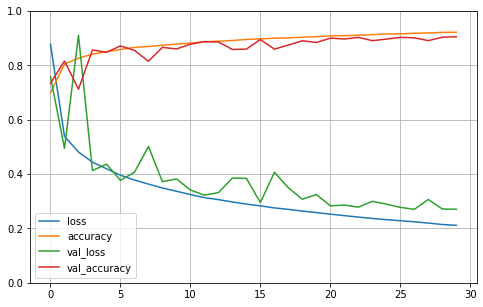

In [13]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
ev = model.evaluate(x_test_n,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2800 - accuracy: 0.8997


In [15]:
x_new = x_test[:3]

In [16]:
y_pred = model.predict_classes(x_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [17]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


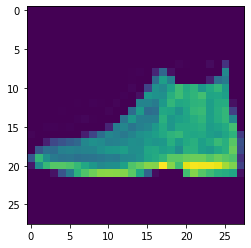

In [18]:
print(plt.imshow(x_test[0].reshape((28,28))))

In [19]:
#without pooling

mod = keras.models.Sequential()
mod.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=1 , padding="valid",activation = 'relu', input_shape =(28,28,1)))


mod.add(keras.layers.Flatten())
mod.add(keras.layers.Dense(300, activation = 'relu'))
mod.add(keras.layers.Dense(100, activation = 'relu'))
mod.add(keras.layers.Dense(10, activation = 'softmax'))

In [21]:
mod.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               6489900   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [20]:
mod.compile(loss="sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics=["accuracy"])

In [22]:
mod_history = mod.fit(x_train, y_train ,epochs=50,batch_size = 64, validation_data=(x_valid , y_valid))

Epoch 1/50
860/860 [==============================] - 38s 45ms/step - loss: 0.7184 - accuracy: 0.7504 - val_loss: 0.7073 - val_accuracy: 0.7392
Epoch 2/50
860/860 [==============================] - 35s 41ms/step - loss: 0.4898 - accuracy: 0.8225 - val_loss: 0.4675 - val_accuracy: 0.8216
Epoch 3/50
860/860 [==============================] - 35s 41ms/step - loss: 0.4383 - accuracy: 0.8409 - val_loss: 0.8315 - val_accuracy: 0.7164
Epoch 4/50
860/860 [==============================] - 36s 41ms/step - loss: 0.4067 - accuracy: 0.8521 - val_loss: 0.3935 - val_accuracy: 0.8574
Epoch 5/50
860/860 [==============================] - 35s 41ms/step - loss: 0.3864 - accuracy: 0.8608 - val_loss: 0.3878 - val_accuracy: 0.8580
Epoch 6/50
860/860 [==============================] - 35s 41ms/step - loss: 0.3661 - accuracy: 0.8663 - val_loss: 0.3574 - val_accuracy: 0.8718
Epoch 7/50
860/860 [==============================] - 36s 42ms/step - loss: 0.3527 - accuracy: 0.8718 - val_loss: 0.3797 - val_accuracy:

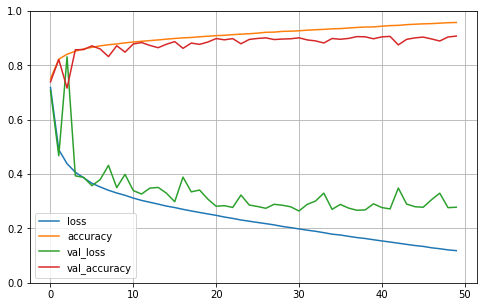

In [23]:
import pandas as pd

pd.DataFrame(mod_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()